In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
data = pd.read_csv('/content/deliverytime.txt')

data.head(10)

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   
5  9BB4      HYDRES09DEL03                   22                      4.8   
6  95B4   RANCHIRES15DEL01                   33                      4.7   
7  9EB2      MYSRES15DEL02                   35                      4.6   
8  1102      HYDRES05DEL02                   22                      4.8   
9  CDCD      DEHRES17DEL01                   36                      4.2   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   
5            17.431668             78.408321                   17.461668   
6            23.369746             85.339820                   23.479746   
7            12.352058             76.606650                   12.482058   
8            17.433809             78.386744                   17.563809   
9            30.327968             78.046106                   30.397968   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0                    75.912471        Snack      motorcycle                24  
1                    77.813237        Snack         scooter                33  
2                    77.688400       Drinks      motorcycle                26  
3                    77.026494       Buffet      motorcycle                21  
4                    80.289982        Snack         scooter                30  
5                    78.438321       Buffet      motorcycle                26  
6                    85.449820         Meal         scooter                40  
7                    76.736650         Meal      motorcycle                32  
8                    78.516744       Buffet      motorcycle                34  
9                    78.116106        Snack      motorcycle                46

In [ ]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [ ]:
print(data.describe())

       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         45593.000000             45593.000000         45593.000000   
mean             29.544075                 4.632367            17.017729   
std               5.696793                 0.327708             8.185109   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.600000            12.933284   
50%              29.000000                 4.700000            18.546947   
75%              34.000000                 4.800000            22.728163   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          45593.000000                45593.000000   
mean              70.231332                   17.465186   
std               22.883647                    7.335122   
min              -88.366217                    0.010000   
25%               73

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r


# Define a function to apply the haversine function to each row of a DataFrame
def calc_distance(row):
    return haversine(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude'])

# Apply the calc_distance function to each row of the DataFrame to calculate the distance
data['distance'] = data.apply(calc_distance, axis=1)

In [ ]:
data.head(10)

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   
5  9BB4      HYDRES09DEL03                   22                      4.8   
6  95B4   RANCHIRES15DEL01                   33                      4.7   
7  9EB2      MYSRES15DEL02                   35                      4.6   
8  1102      HYDRES05DEL02                   22                      4.8   
9  CDCD      DEHRES17DEL01                   36                      4.2   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   
5            17.431668             78.408321                   17.461668   
6            23.369746             85.339820                   23.479746   
7            12.352058             76.606650                   12.482058   
8            17.433809             78.386744                   17.563809   
9            30.327968             78.046106                   30.397968   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  \
0                    75.912471        Snack      motorcycle                24   
1                    77.813237        Snack         scooter                33   
2                    77.688400       Drinks      motorcycle                26   
3                    77.026494       Buffet      motorcycle                21   
4                    80.289982        Snack         scooter                30   
5                    78.438321       Buffet      motorcycle                26   
6                    85.449820         Meal         scooter                40   
7                    76.736650         Meal      motorcycle                32   
8                    78.516744       Buffet      motorcycle                34   
9                    78.116106        Snack      motorcycle                46   

    distance  
0   3.025149  
1  20.183530  
2   1.552758  
3   7.790401  
4   6.210138  
5   4.610365  
6  16.600361  
7  20.205253  
8  19.975520  
9  10.280582

<ipython-input-19-4f6c5d698448>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


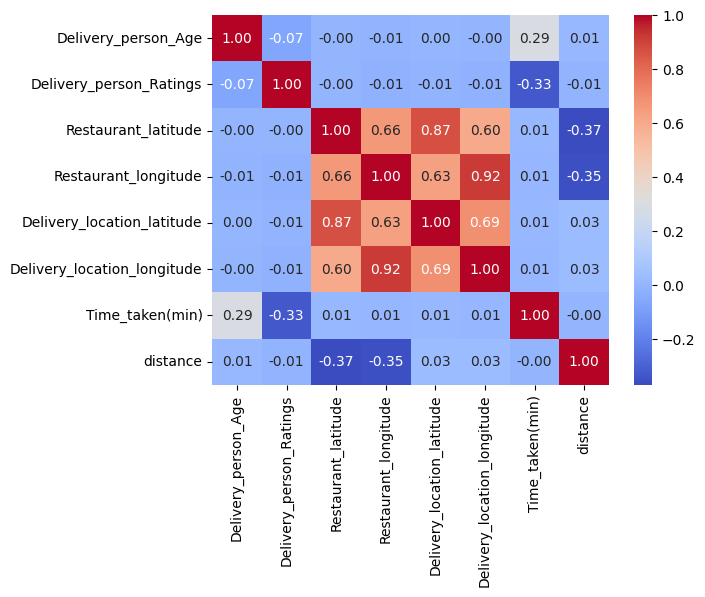

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Visualize the correlations using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

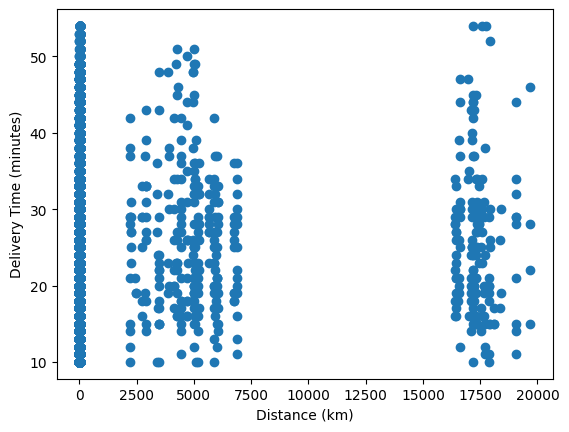

In [ ]:
# Create a scatter plot of distance vs. delivery time
plt.scatter(data['distance'], data['Time_taken(min)'])
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

import plotly.express as px

figure = px.scatter(data_frame = data,
                    x="distance",
                    y="Time_taken(min)",
                    size="Time_taken(min)",
                    trendline="ols",
                    title = "Relationship Between Distance and Time Taken")
figure.show()


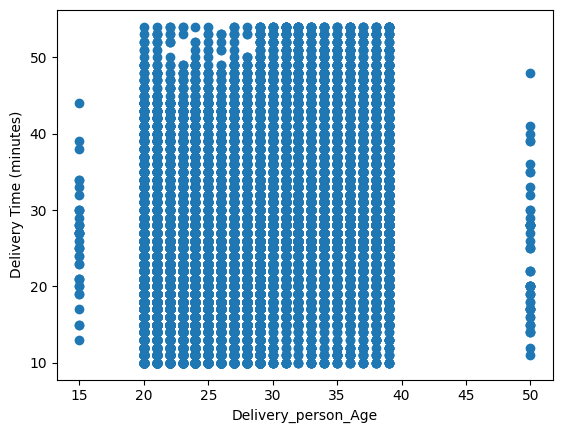

In [ ]:
# Create a scatter plot of distance vs. delivery time
plt.scatter(data['Delivery_person_Age'], data['Time_taken(min)'])
plt.xlabel('Delivery_person_Age')
plt.ylabel('Delivery Time (minutes)')
plt.show()

figure = px.scatter(data_frame = data,
                    x="Delivery_person_Age",
                    y="Time_taken(min)",
                    size="Time_taken(min)",
                    color = "distance",
                    trendline="ols",
                    title = "Relationship Between Time Taken and Age")
figure.show()

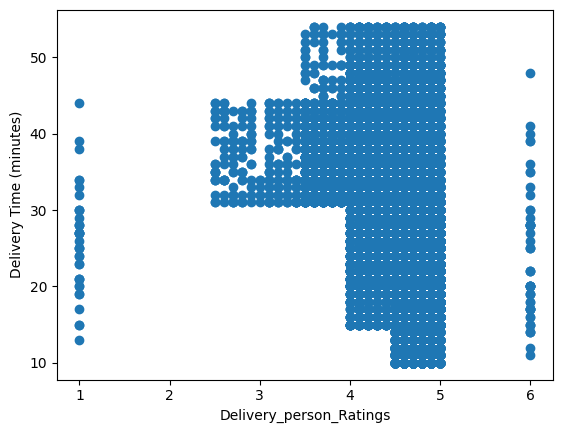

In [ ]:
# Create a scatter plot of distance vs. delivery time
plt.scatter(data['Delivery_person_Ratings'], data['Time_taken(min)'])
plt.xlabel('Delivery_person_Ratings')
plt.ylabel('Delivery Time (minutes)')
plt.show()

figure = px.scatter(data_frame = data,
                    x="Delivery_person_Ratings",
                    y="Time_taken(min)",
                    size="Time_taken(min)",
                    color = "distance",
                    trendline="ols",
                    title = "Relationship Between Time Taken and rate")
figure.show()

In [ ]:
fig = px.box(data,
             x="Type_of_vehicle",
             y="Time_taken(min)",
             color="Type_of_order")
fig.show()

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Delivery_person_Age",
                   "Delivery_person_Ratings",
                   "distance"]])
y = np.array(data[["Time_taken(min)"]])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.10,
                                                random_state=42)

# creating the LSTM neural network model
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=10)

Epoch 1/10
41033/41033 [==============================] - 219s 5ms/step - loss: 69.2326
Epoch 2/10
41033/41033 [==============================] - 213s 5ms/step - loss: 63.7873
Epoch 3/10
41033/41033 [==============================] - 212s 5ms/step - loss: 61.0967
Epoch 4/10
41033/41033 [==============================] - 213s 5ms/step - loss: 60.9339
Epoch 5/10
41033/41033 [==============================] - 210s 5ms/step - loss: 60.5114
Epoch 6/10
41033/41033 [==============================] - 212s 5ms/step - loss: 59.6314
Epoch 7/10
41033/41033 [==============================] - 212s 5ms/step - loss: 59.9469
Epoch 8/10
41033/41033 [==============================] - 213s 5ms/step - loss: 59.7646
Epoch 9/10
41033/41033 [==============================] - 209s 5ms/step - loss: 59.2695
Epoch 10/10
41033/41033 [==============================] - 210s 5ms/step - loss: 59.0797


In [ ]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction
Age of Delivery Partner: 20
Ratings of Previous Deliveries: 4.8
Total Distance: 5
1/1 [==============================] - 1s 819ms/step
Predicted Delivery Time in Minutes =  [[20.129036]]
